In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

<Axes: >

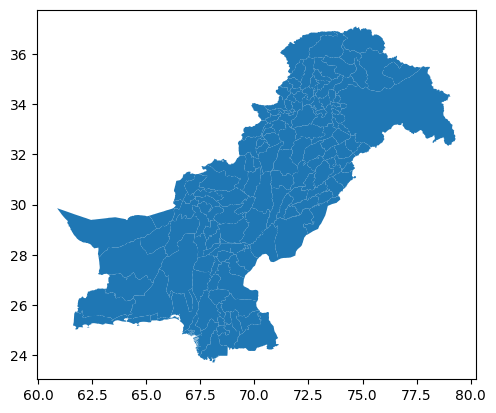

In [7]:
gdf = gpd.read_file("district.geojson")
gdf.plot()

C:\Users\user\AppData\Local\Temp\ipykernel_46596\2998350663.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroids"] = gdf.geometry.centroid


<Axes: >

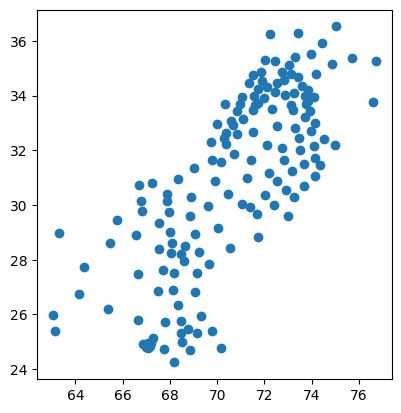

In [9]:
gdf["centroids"] = gdf.geometry.centroid
gdf["centroids"].plot()

<Axes: >

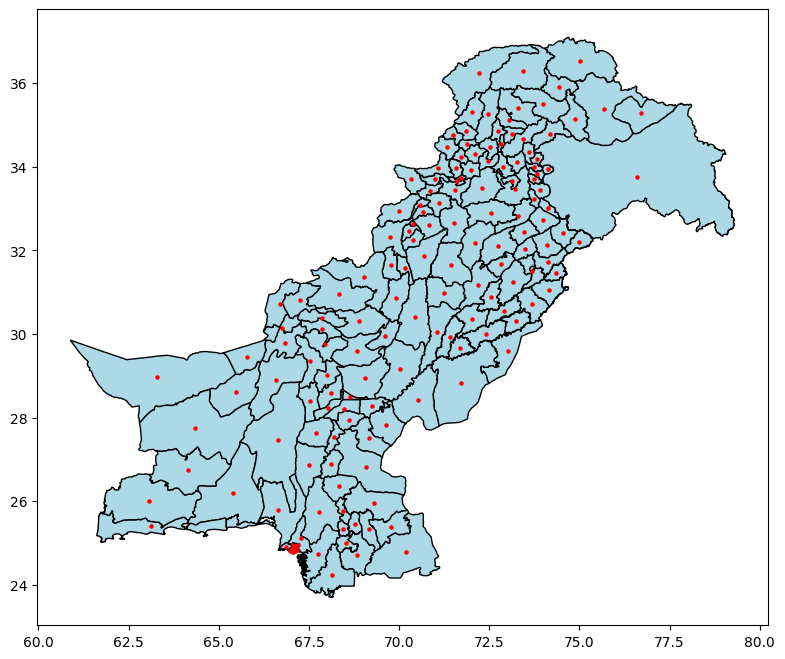

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='lightblue', edgecolor='black')
gdf["centroids"].plot(ax=ax, color='red', markersize=5)

In [16]:
gdf.head()

,OBJECTID,PROVINCE,DISTRICT,Shape_Leng,ADMIN_UNIT,Shape_Le_1,Shape_Le_2,Shape_Area,Class,geometry,centroids
0,1,AZAD KASHMIR,BAGH,1.520042,DISTRICT,1.520042,1.520042,0.066329,3.0,"MULTIPOLYGON (((73.59197 34.07471, 73.61848 34...",POINT (73.73998 33.99337)
1,2,AZAD KASHMIR,BHIMBER,1.855641,DISTRICT,1.855641,1.855641,0.115509,4.0,"MULTIPOLYGON (((73.97469 33.24033, 73.9791 33....",POINT (74.13172 33.01497)
2,3,AZAD KASHMIR,HATTIAN BALA,1.383230,DISTRICT,1.383230,1.383230,0.070850,3.0,"MULTIPOLYGON (((73.93623 34.3396, 73.93853 34....",POINT (73.83355 34.19376)
3,4,AZAD KASHMIR,HAVELI,1.020584,DISTRICT,1.020584,1.020584,0.052888,3.0,"MULTIPOLYGON (((74.16884 34.03866, 74.18113 34...",POINT (74.11922 33.93592)
4,5,AZAD KASHMIR,KOTLI,1.941553,DISTRICT,1.941553,1.941553,0.156810,4.0,"MULTIPOLYGON (((73.7272 33.5877, 73.74046 33.5...",POINT (73.91536 33.45221)


In [23]:
temp = {}
for eachProvince in gdf["PROVINCE"].unique():
    for eachDistrict in gdf.loc[gdf["PROVINCE"] == eachProvince, :]["DISTRICT"].unique():
        temp[eachProvince] = temp.get(eachProvince, {})
        temp[eachProvince][eachDistrict] = (gdf.loc[(gdf["PROVINCE"] == eachProvince) & (gdf["DISTRICT"] == eachDistrict), "centroids"].iloc[0].y, gdf.loc[(gdf["PROVINCE"] == eachProvince) & (gdf["DISTRICT"] == eachDistrict), "centroids"].iloc[0].x)

In [24]:
temp

{'AZAD KASHMIR': {'BAGH': (33.99337266039674, 73.73998450875354),
  'BHIMBER': (33.01496724426345, 74.131720196198),
  'HATTIAN BALA': (34.19375765650965, 73.83354511233324),
  'HAVELI': (33.935924192436794, 74.11921924165692),
  'KOTLI': (33.45221224482643, 73.91536457946866),
  'MIRPUR': (33.233325578941084, 73.74103700267189),
  'MUZAFFARABAD': (34.353445235171016, 73.59187758954516),
  'NEELUM': (34.79109334423621, 74.17583133110496),
  'POONCH': (33.81673508893061, 73.83770848804653),
  'SUDHNOTI': (33.70248443672862, 73.74638177882504)},
 'BALOCHISTAN': {'AWARAN': (26.194468608615775, 65.3826293217998),
  'BARKHAN': (29.954128185660576, 69.61770653439098),
  'CHAGAI': (28.977363668335656, 63.2824324823143),
  'DERA BUGTI': (28.95414027047104, 69.04963404067071),
  'GWADAR': (25.397367787265292, 63.12106627101464),
  'HARNAI': (30.129007445586883, 67.86503420187688),
  'JAFFARABAD': (28.228858179433285, 68.02819907199952),
  'JHAL MAGSI': (28.405547729809637, 67.52544405432475),
 